Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*Abel*</p>| <p style="text-align: left">*Boros*</p> | *K11944603* |
| <p style="text-align: left">*Basit*</p>| <p style="text-align: left">*Nadeem*</p> | *K12248140* |


<h2 style="text-align: center">344.105/6/7 UE: Natural Language Processing (WS2022/23)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div style="background-color:rgb(224, 243, 255)">
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Authors:** Navid Rekab-saz, Oleg Lesota<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div style="background-color:rgb(224, 243, 255)">

### Assignment objective

The aim of this assignment is to implement a document (sentence) classification model using (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

</div>


<div style="background-color:rgb(224, 243, 255)">

### Libraries & Dataset

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

To conduct the experiments, we use a subset of the `HumSet` dataset [1] (https://blog.thedeep.io/humset/). `HumSet` is created by the DEEP (https://www.thedeep.io) project – an open source platform which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset contains the classes (labels) referring to the humanitarian sectors like agriculture, health, and protection. The dataset contains an overall number of 17,301 data points. 

Download the dataset from the Moodle page of the course.

the provided zip file consists of the following files:
- `thedeep.subset.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.subset.labels.txt`: Captions of the labels.
- `thedeep.ToU.txt`: Terms of use of the dataset.

[1] HumSet: Dataset of Multilingual Information Extraction and Classification for Humanitarian Crises Response
*Selim Fekih, Nicolo' Tamagnone, Benjamin Minixhofer, Ranjan Shrestha, Ximena Contla, Ewan Oglethorpe and Navid Rekabsaz.* 
In Findings of the 2022 Conference on Empirical Methods in Natural Language Processing (Findings of EMNLP), December 2022.

</div>



<div style="background-color:rgb(224, 243, 255)">

### Submission

Each group should submit the following two files:

- One Jupyter Notebook file (`.ipynb`), containing all the code, results, visualizations, etc. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that (if necessary) one can run all the cells from top to bottom without any error. Do not forget to put in your names and student numbers in the first cell of the Notebook. 
- The HTML file (`.html`) achieved from exporting the Jupyter Notebook to HTML (Download As HTML).

You do not need to include the data files in the submission.


</div>

<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">
    
**Preprocessing (5 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (5 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (5 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. One applied weighting must be `tf-idf` and the other one can be any other method discussed in the lecture such as `tc`, `tf`, `BM25`. These term weighting methods should be implemented; using a library to readily calculate the term weightings is not allowed. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

</div>

<h2>Preprocessing</h2>

In [1]:
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import pandas as pd
import re
import nltk
import numpy as np

wordnet_lemmatizer = WordNetLemmatizer()

In [2]:
# Utility functions

def read_text(path_to_textfile):
    return pd.read_csv(path_to_textfile, names=['sentence_id', 'text', 'label'])

def text_to_lowercase(dataframe):
    return dataframe['text'].apply(lambda text: text.lower())

def remove_punctation(dataframe):
    return dataframe['text'].apply(lambda text: re.sub(r'[^\w\s]', '', text))

def tokenize(dataframe):
    return dataframe['text'].apply(lambda text: nltk.word_tokenize(text))

def lemmatize_text(text):
    lemmatized_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemmatized_text

def remove_stopwords_in_text(text):
    stopwords = nltk.corpus.stopwords.words('english')
    text_without_stopwords = [i for i in text if i not in stopwords]
    return text_without_stopwords
    
def remove_stopwords_from_dataframe(dataframe):
    return dataframe['text'].apply(lambda text: remove_stopwords_in_text(text))
    
def lemmatize_df(datafarme):
    return datafarme['text'].apply(lambda text: lemmatize_text(text))

In [3]:
# Raw data goes into the pipline in form of a pandas dataframe.
# It must have a 'text' column which contains the actual text.
# Returned: A datafarme with proprocessed 'text' column.
preprocessing_pipeline = [text_to_lowercase, 
                          remove_punctation, 
                          tokenize, 
                          remove_stopwords_from_dataframe, 
                          lemmatize_df]

In [4]:
train_set = read_text('./data/thedeep.subset.train.txt')
validation_set = read_text('./data/thedeep.subset.validation.txt')
test_set = read_text('./data/thedeep.subset.test.txt')

In [5]:
train_set

,sentence_id,text,label
0,5446,In addition to the immediate life-saving inter...,9
1,8812,There are approximately 2.6 million people cla...,3
2,16709,"While aid imports have held up recently, comme...",5
3,3526,Heavy rainfalls as well as onrush of water fro...,0
4,4928,"Based on field reports 9 , the main production...",3
...,...,...,...
12105,12744,The total gap in the number of people who requ...,8
12106,9655,A food crisis is looming in the country with t...,0
12107,6963,? Acute watery diarrhoea (AWD) continues to be...,4
12108,923,As South India grapples with drought and water...,11


We applied different preprocessing steps to clean our data, you can find the functions with a descriptive names in the field with the utility functions comment.
Our pipeline looks like this:

<b>text -> convert to lowercase letters -> remove punctation from the sentences -> tokenize the whole text -> get rid of the stopwords -> lemmatize the whole dataset.</b>

In [6]:
example_text = train_set.iloc[[0]].copy()
print('TEXT WITHOUT PREPROCESSING:')
print(example_text['text'][0])
print('------------------------------------------------------------------------------------')
print('LOWERCASE:')
example_text['text'] = text_to_lowercase(example_text)[0]
print(example_text['text'][0])
print('------------------------------------------------------------------------------------')
print('REMOVE PUNCTATION:')
example_text['text'] = remove_punctation(example_text)[0]
print(example_text['text'][0])
print('------------------------------------------------------------------------------------')
print('TOKENIZATION:')
example_text['text'] = tokenize(example_text)
print(example_text['text'][0])
print('------------------------------------------------------------------------------------')
print('REMOVE STOPWORDS:')
example_text['text'] = remove_stopwords_from_dataframe(example_text)
print(example_text['text'][0])
print('------------------------------------------------------------------------------------')
print('LEMMATIZATION:')
example_text['text'] = lemmatize_df(example_text)
print(example_text['text'][0])
print('------------------------------------------------------------------------------------')

TEXT WITHOUT PREPROCESSING:
In addition to the immediate life-saving interventions, UNICEF is taking action to protect 200 children who have arrived at the camps in Angola without their families.
------------------------------------------------------------------------------------
LOWERCASE:
in addition to the immediate life-saving interventions, unicef is taking action to protect 200 children who have arrived at the camps in angola without their families.
------------------------------------------------------------------------------------
REMOVE PUNCTATION:
in addition to the immediate lifesaving interventions unicef is taking action to protect 200 children who have arrived at the camps in angola without their families
------------------------------------------------------------------------------------
TOKENIZATION:
['in', 'addition', 'to', 'the', 'immediate', 'lifesaving', 'interventions', 'unicef', 'is', 'taking', 'action', 'to', 'protect', '200', 'children', 'who', 'have', 'arrived'

In [7]:
# Apply the pipeline on the train, validation and test set.
for function in preprocessing_pipeline:
    train_set['text'] = function(train_set)
    validation_set['text'] = function(validation_set)
    test_set['text'] = function(test_set)

In [8]:
label_counts = train_set['label'].value_counts().reset_index()
label_counts = label_counts.sort_values(by='label', ascending=True)

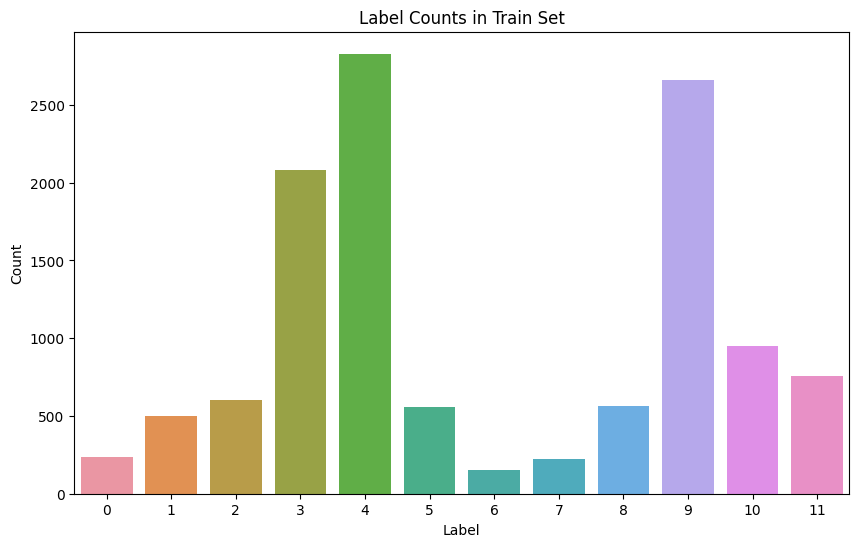

In [9]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='label', y='count', data=label_counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts in Train Set')
plt.show()

<h2>Creating a dictionary</h2>

In [10]:
# Utility functions

def get_tokens_as_list(dataframe):  
    corpus = dataframe['text'].tolist()
    corpus = [word for sublist in corpus for word in sublist]
    return corpus

def get_wordfrequencies_from_list(corpus):
    wordfrequencies = {}
    for word in corpus:
        if word not in wordfrequencies.keys():
            wordfrequencies[word] = 1
        else:
            wordfrequencies[word] += 1
    return wordfrequencies

def filter_words(list_of_tokens, dictionary):
    # Delete the tokens which is not part of the dictionary
    return [token for token in list_of_tokens if token in dictionary]
    
def oov_on_dataframe(dataframe, dictionary):
    return dataframe['text'].apply(lambda text: filter_words(text, dictionary))

def token_counter(dataframe, column_name):
    dataframe[column_name] = dataframe['text'].apply(len)
    return dataframe

# The collection of functions, this is the only one which needed to be called.
def BOW(dataframe):
    corpus = get_tokens_as_list(dataframe)
    wordfrequencies = get_wordfrequencies_from_list(corpus)

    # Sort the dictionary by frequencies
    wordfrequencies = dict(sorted(wordfrequencies.items(), key=lambda item: item[1], reverse=True))

    # Remove words with low frequency (< 200)
    wordfrequencies = {key: value for key, value in wordfrequencies.items() if value >= 200}
    
    dataframe = token_counter(dataframe, 'token count')

    # Delete the words which are not part of the wordfrequencies dictionary
    dataframe['text'] = oov_on_dataframe(dataframe, wordfrequencies)

    dataframe = token_counter(dataframe, 'token count after oov')
    
    return dataframe, wordfrequencies

In [11]:
# Getting the Bag Of Words representations of the Train, Validation and Test set.
train_set, bow_train_dict = BOW(train_set)
test_set, bow_test_dict = BOW(test_set)
validation_set, bow_val_dict = BOW(validation_set)

In [12]:
train_set[['token count', 'token count after oov']].describe()
# The average token in a list decreased from 44.77 to 24.10, it's an average decrease of 20.67

,token count,token count after oov
count,12110.000000,12110.000000
mean,44.773410,24.101321
std,39.938087,22.800909
min,4.000000,0.000000
25%,21.000000,10.000000
50%,35.000000,18.000000
75%,57.000000,31.000000
max,1489.000000,787.000000


In [13]:
test_set[['token count', 'token count after oov']].describe()

,token count,token count after oov
count,2595.000000,2595.000000
mean,43.578805,9.328324
std,34.168370,8.807683
min,5.000000,0.000000
25%,21.000000,4.000000
50%,35.000000,7.000000
75%,55.000000,12.000000
max,351.000000,110.000000


In [14]:
validation_set[['token count', 'token count after oov']].describe()

,token count,token count after oov
count,2596.000000,2596.000000
mean,44.456086,9.935670
std,37.882162,9.742509
min,5.000000,0.000000
25%,21.000000,4.000000
50%,35.000000,7.000000
75%,56.000000,13.000000
max,777.000000,111.000000


<h2>Creating sentence vectors</h2>

In [15]:
def document_word_matrix(dataframe, wordfrequencies):
    list_of_words = list(wordfrequencies.keys())
    column_names = ['sentence_id'] + list_of_words + ['labels']
    df = pd.DataFrame(0, index=range(len(dataframe)), columns=column_names)
    df.iloc[:, 0] = dataframe['sentence_id']
    df.iloc[:, -1] = dataframe['label']
    
    for i, word in enumerate(list_of_words):
        for j, document in enumerate(dataframe['text']):
            count = document.count(word)
            df.at[j, word] = count
        
    return df

def term_frequency(x):
    return np.log(1 + x)

# This function suppose that we have the basic document word matrix with the term counts
def count_term_frequency_on_df(dataframe):
    df = dataframe.copy()
    df.iloc[:, 1:-1] = df.iloc[:, 1:-1].applymap(term_frequency)
    return df

def inverse_document_freq(dataframe):
    idf_dict = {column: (np.log(dataframe.shape[0] / ((dataframe[column] > 0).sum() + 1))) if (dataframe[column] > 0).sum() > 0 else 0 for column in dataframe.columns[1:-1]}
    return idf_dict

def tf_idf(count_term_matrix, idf):
    count_term_matrix_temp = count_term_matrix.copy()
    
    for index, row in count_term_matrix_temp.iterrows():
        for column_name, value in row.iloc[1:-1].items():
            count_term_matrix_temp.at[index, column_name] = value * idf[column_name]
            
    return count_term_matrix_temp

def BM25(count_term_matrix, idf, collection, k=0.5, b=0):
    count_term_matrix_temp = count_term_matrix.copy()
    avg_doc_length = sum(collection['token count after oov']) / collection.shape[0]
    
    for index, row in count_term_matrix_temp.iterrows():
        token_count_current_doc = collection[collection['sentence_id'] == int(row[0])]['token count after oov'].iloc[0]
        for column_name, value in row.iloc[1:-1].items():
            count_term_matrix_temp.at[index, column_name] = (((k + 1) * value) / (k * (1 - b + (b * (token_count_current_doc / avg_doc_length))) + value)) * idf[column_name]
        
            
    return count_term_matrix_temp

In [16]:
# Create the term count matrix here.
document_word_matrix_train = document_word_matrix(train_set, bow_train_dict)
document_word_matrix_test = document_word_matrix(test_set, bow_test_dict)
document_word_matrix_val = document_word_matrix(validation_set, bow_val_dict)

<b>TF-IDF</b>

In [17]:
idf_dict_train = inverse_document_freq(document_word_matrix_train)
count_term_train_matrix = count_term_frequency_on_df(document_word_matrix_train)
tf_idf_train = tf_idf(count_term_train_matrix, idf_dict_train)

In [18]:
idf_dict_test = inverse_document_freq(document_word_matrix_test)
count_term_test_matrix = count_term_frequency_on_df(document_word_matrix_test)
tf_idf_test = tf_idf(count_term_test_matrix, idf_dict_test)

In [19]:
idf_dict_val = inverse_document_freq(document_word_matrix_val)
count_term_val_matrix = count_term_frequency_on_df(document_word_matrix_val)
tf_idf_val = tf_idf(count_term_val_matrix, idf_dict_val)

<b>BM25</b>

In [20]:
BM25_train = BM25(count_term_train_matrix, idf_dict_train, train_set)

In [21]:
BM25_test = BM25(count_term_test_matrix, idf_dict_test, test_set)

In [22]:
BM25_val = BM25(count_term_val_matrix, idf_dict_val, validation_set)

<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div style="background-color:rgb(224, 243, 255)">

To evaluate the models, use <ins>accuracy</ins> as the metric throughout the task. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>four experiment sets</ins> (2 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters. For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>three values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation, reporting results, and discussion (3 point).** Evaluate the selected models of the four experiments on the test set. Report the results of <ins>the four experiments on both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different experiments and models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.


</div>

<h2>Convert data representation</h2>

In [24]:
def convert_data(train_dataframe, dataframe_to_convert):
    common_columns = set(train_dataframe.iloc[:, 1:-1].columns.intersection(dataframe_to_convert.iloc[:, 1:-1].columns))
    transformed_df = pd.DataFrame(columns=train_dataframe.iloc[:, 1:-1].columns, data=dataframe_to_convert.iloc[:, 1:-1])
    transformed_df= transformed_df.fillna(0)
    return transformed_df

In [25]:
transformed_tf_idf_val = convert_data(tf_idf_train, tf_idf_val)

In [27]:
transformed_tf_idf_test = convert_data(tf_idf_train, tf_idf_test)

In [33]:
transformed_BM25_val = convert_data(BM25_train, BM25_val)

In [34]:
transformed_BM25_test = convert_data(BM25_train, BM25_test)

## Dummy baseline

In [23]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Train a dummy classifier on the training data
dummy_clf = DummyClassifier(strategy='stratified', random_state=0)
dummy_clf.fit(train_set['text'], train_set['label'])

# Predict the labels for the validation and test sets
val_pred = dummy_clf.predict(validation_set['text'])
test_pred = dummy_clf.predict(test_set['text'])

# Calculate the accuracy of the dummy classifier on the validation and test sets
val_accuracy = accuracy_score(validation_set['label'], val_pred)
test_accuracy = accuracy_score(test_set["label"], test_pred)

print(f'Validation accuracy: {val_accuracy}')
print(f'Test accuracy: {test_accuracy}')

Validation accuracy: 0.15832049306625579
Test accuracy: 0.16878612716763006


## Training and Tuning Classifiers

In [34]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(random_state=0)
rf_clf = RandomForestClassifier(random_state=0)

# Define the hyper-parameters to tune
param_grid_svm = {'C': [0.1, 1, 10]}
param_grid_rf = {'n_estimators': [10, 100, 1000]}

# Grid search objects 
grid_search_svm_idf = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='accuracy')
grid_search_rf_idf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy')

grid_search_svm_idf.fit(tf_idf_train.iloc[:, 1:-1], train_set['label'])
grid_search_rf_idf.fit(tf_idf_train.iloc[:, 1:-1], train_set['label'])

# Get the best parameters and scores
best_params_svm_tf_idf = grid_search_svm_idf.best_params_
best_score_svm_tf_idf = grid_search_svm_idf.best_score_
best_params_rf_tf_idf = grid_search_rf_idf.best_params_
best_score_rf_tf_idf = grid_search_rf_idf.best_score_

# Print the results
print(f'SVM with TF-IDF best params: {best_params_svm_tf_idf}')
print(f'SVM with TF-IDF best score: {best_score_svm_tf_idf}')
print(f'RF with TF-IDF best params: {best_params_rf_tf_idf}')
print(f'RF with TF-IDF best score: {best_score_rf_tf_idf}')

# TODO: Do the same on the other sentence vector.

SVM with TF-IDF best params: {'C': 1}
SVM with TF-IDF best score: 0.7558216350123865
RF with TF-IDF best params: {'n_estimators': 1000}
RF with TF-IDF best score: 0.7615194054500414


In [37]:
# Define the grid search objects for BoW
grid_search_svm_bm25 = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='accuracy')
grid_search_rf_bm25 = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search objects to the data
grid_search_svm_bm25.fit(BM25_train.iloc[:, 1:-1], train_set['label']) 
grid_search_rf_bm25.fit(BM25_train.iloc[:, 1:-1], train_set['label'])  

# Get the best parameters and scores
best_params_svm_bow = grid_search_svm_bm25.best_params_
best_score_svm_bow = grid_search_svm_bm25.best_score_
best_params_rf_bow = grid_search_rf_bm25.best_params_
best_score_rf_bow = grid_search_rf_bm25.best_score_

# Print the results
print(f'SVM with BM25 best params: {best_params_svm_bow}')
print(f'SVM with BM25 best score: {best_score_svm_bow}')
print(f'RF with BM25 best params: {best_params_rf_bow}')
print(f'RF with BM25 best score: {best_score_rf_bow}')

SVM with BM25 best params: {'C': 1}
SVM with BM25 best score: 0.7547481420313791
RF with BM25 best params: {'n_estimators': 1000}
RF with BM25 best score: 0.7616845582163501


<h2>Evaluation on Validation Set</h2>

## Evaluation on Test Set

In [95]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the best models
svm_tfidf_pred = grid_search_svm_idf.best_estimator_.predict(transformed_tf_idf_test)
rf_tfidf_pred = grid_search_rf_idf.best_estimator_.predict(transformed_tf_idf_test)
svm_bm25_pred = grid_search_svm_bm25.best_estimator_.predict(transformed_BM25_test)  
rf_bm25_pred = grid_search_rf_bm25.best_estimator_.predict(transformed_BM25_test)  

# Calculate the accuracies for the test set
svm_tfidf_acc_test = accuracy_score(test_set['label'], svm_tfidf_pred)
rf_tfidf_acc_test = accuracy_score(test_set['label'], rf_tfidf_pred)
svm_bm25_acc_test = accuracy_score(test_set['label'], svm_bm25_pred)
rf_bm25_acc_test = accuracy_score(test_set['label'], rf_bm25_pred)

# Create a table and a plot for the results
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the results
results = pd.DataFrame({
    'Model': ['SVM', 'RF', 'SVM', 'RF'],
    'Feature': ['TF-IDF', 'TF-IDF', 'BM25', 'BM25'],
    'Validation Accuracy': [best_score_svm_tf_idf, best_score_rf_tf_idf, best_score_svm_bow, best_score_rf_bow],
    'Test Accuracy': [svm_tfidf_acc_test, rf_tfidf_acc_test, svm_bm25_acc_test, rf_bm25_acc_test]
})

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Test Accuracy', hue='Model', data=results)
plt.title('Test Accuracy of Models with Different Features')
plt.show()

# Print the table
print(results)


/Users/basitnadeem/opt/miniconda3/envs/minimal_ds/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- 000
- 10
- 100
- 11
- 12
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 75 features, but SVC is expecting 501 features as input.

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Identify the best performing model
best_model = results.iloc[results['Test Accuracy'].idxmax()]

# Use the best model to predict the test set labels
if best_model['Model'] == 'SVM' and best_model['Feature'] == 'TF-IDF':
    best_pred = svm_tfidf_pred
elif best_model['Model'] == 'RF' and best_model['Feature'] == 'TF-IDF':
    best_pred = rf_tfidf_pred
elif best_model['Model'] == 'SVM' and best_model['Feature'] == 'BoW':
    best_pred = svm_bm25_pred
elif best_model['Model'] == 'RF' and best_model['Feature'] == 'BoW':
    best_pred = rf_bm25_pred

# Generate the confusion matrix
cm = confusion_matrix(test_set['label'], best_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels='', yticklabels='') # unique labels 
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for the Best Performing Model')
plt.show()

# Analyze the confusion matrix
# Identify any significant confusions across classes
# (analysis here)


## Feature Visualization 

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Extract feature vectors for the test set
#feature_vectors_test = model.named_steps['your_feature_extraction_step_name'].transform(test_set)

# Step 2: Use t-SNE to project feature vectors to 2-dimensional space
tsne = TSNE(n_components=2, random_state=42)
X_2d = tsne.fit_transform(feature_vectors_test)

# Step 3: Create two scatter plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Step 4: Scatter plot for true labels
scatter = axes[0].scatter(X_2d[:, 0], X_2d[:, 1], c=test_set['label'], cmap='viridis')
axes[0].set_title('True Labels')
legend1 = axes[0].legend(*scatter.legend_elements(), title="Classes")
axes[0].add_artist(legend1)

# Step 5: Scatter plot for predicted labels
predicted_labels = model.predict(test_set)
scatter = axes[1].scatter(X_2d[:, 0], X_2d[:, 1], c=predicted_labels, cmap='viridis')
axes[1].set_title('Predicted Labels')
legend2 = axes[1].legend(*scatter.legend_elements(), title="Classes")
axes[1].add_artist(legend2)

plt.show()


<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra points)</h2>

<div style="background-color:rgb(224, 243, 255)">
Train a logistic regression model on one of the document representations. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>

In [50]:
from sklearn.linear_model import LogisticRegression

# Step 1: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(tf_idf_train.iloc[:, 1:-1], train_set['label'])

# Step 2: Extract coefficient weights
coefficients = model.coef_

# Step 3: Identify tokens with the highest contributions for each class
feature_names = list(bow_train_dict.keys())  # Get feature names
top_n_tokens = 5  # Number of top tokens to display

for i in range(coefficients.shape[0]):
    class_weights = coefficients[i]
    sorted_indices = class_weights.argsort()[::-1]
    top_tokens = [(feature_names[j], class_weights[j]) for j in sorted_indices[:top_n_tokens]]
    
    print(f"Class {i} - Top {top_n_tokens} tokens:")
    for token, weight in top_tokens:
        print(f"{token}: {weight}")
    print()


Class 0 - Top 5 tokens:
crop: 1.1827844966911876
agricultural: 1.129246518132164
sexual: 1.0419295877351107
harvest: 1.0219479676132195
maize: 0.9828235507242286

Class 1 - Top 5 tokens:
stressed: 1.1895164674520702
staple: 0.7806987008529056
market: 0.7117533583487122
21: 0.6348010406218262
lean: 0.6305368266508338

Class 2 - Top 5 tokens:
school: 2.6816138884653427
education: 2.5932860331258913
child: 1.371121051199711
measles: 1.0732303820847888
student: 1.0443261737147624

Class 3 - Top 5 tokens:
food: 2.34410572379981
ipc: 1.0420345211566626
crop: 0.9576288821483436
insecure: 0.8868484831633425
price: 0.8668728144502404

Class 4 - Top 5 tokens:
health: 2.0079953689030807
malaria: 1.5748859010481475
case: 1.401742459557337
dengue: 1.3166119925338553
cholera: 1.211757206741559

Class 5 - Top 5 tokens:
livestock: 1.1509233811187634
livelihood: 1.1416828980606162
crop: 0.9502820339719801
income: 0.9180396659909594
maize: 0.8193007201434109

Class 6 - Top 5 tokens:
road: 1.711467066369